<a href="https://colab.research.google.com/github/sweetmjkim/study_AIs/blob/main/docs/quests/NLPs/Q_wordcloud_regexp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quests
- Oneword Game을 wordcloud
- 본인 작성 내용만 변환(values(list) 활용)
- option] 상위 30단어만 표시

## 데이터 가지고 오기

In [1]:
# 한글 처리
# !apt-get -y install fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [19]:
import pandas as pd
import numpy as np

In [20]:
df_OWG = pd.read_excel('/content/OneWord_Game.xlsx', sheet_name=None)

In [32]:
df_OWG_ALL = pd.concat(df_OWG.values(), axis=1)
df_OWG_ALL[:2]

,,2024-02-16 00:00:00,2024-02-15 00:00:00,2024-02-14 00:00:00,2024-02-13 00:00:00,2024-02-07 00:00:00,2024-02-06 00:00:00,2024-02-05 00:00:00,2024-02-02 00:00:00,2024-02-01 00:00:00,...,12월 22일,12월 21일,12월 20일,12월 19일,12월 18일,12월 15일,12월 14일,12월 13일,12월 12일,12월 11일
0,문석천,NaN,비지도학습\n머신러닝 학습의 일종으로 정답이 존재하지 않을 때 사용하는 방식이다.\...,랜덤포레스트\n지도 학습 알고리즘으로 의사결정트리의 집합이다.\n목적은 True나 ...,지도학습 (supervisor learning)\n머신러닝의 일종으로 컴퓨터에 모델...,귀무가설\nEDA를 통해 얻은 인사이트를 기반으로 CDA를 통해서 규명하고자 하는 ...,pearsonr\n다변수 검증 시 변수가 연속형과 연속형이고 정규분포일 경우 사용하...,insight\n인사이트를 통해 얻은 데이터를 기반으로 분석하여 얻는 과정으로 데이...,EDA(탐색 데이터 분석)\n얻은 데이터를 토대로 데이터탐색을 통한 가설을 수립하는...,boolean indexing\n데이터 프레임 내에서 컬럼에 특정 condition...,...,wget\n웹크롤링의 단계 중 하나로 브라우저의 URL을 커맨드(터미널)에 입력하여...,self\nClass 내에서 모든 resource를 사용할때 class의 구성인자라...,$eq\ncollection에서 특정 key값과 일치하는 정보를 찾아낼 때 사용하며...,updateOne()\ndatabase의 collection 내 특정 key에 해당...,$ in\nMongo DB에서 사용되는 연산자로 리스트 내 특정 키워드 값이 들어있...,$Find\ndatabase의 collection 내 특정 key에 해당하는 val...,Docker desktop\n하나의 데스크탑에서 또다른 OS나 다른 버전의 프로그램...,import\n다른 파일에서 class와 그 안에 있는 function들을 불러올 ...,__init__\nclass가 생성될때 자동적으로 생성되는 function이며 cl...,merge chages\npull을 할 때 또다른 공유 사용자와 작업내용이 다를 경...
1,김유진,NaN,특성공학(feature engineering)\n원시 데이터로부터 유용한 특성을 추...,선형회귀(linear Regression)\n종속 변수 y와 한 개 이상의 독립변수...,"scikit-learn(사이킷런), sklearn\n파이썬을 기반으로 작동하는 오픈...",NaN,CDA 확증 데이터 분석(Confirmatory Data Analysis)\n규명하...,cut()\n데이터를 구간 길이에 따라 나누는 함수로 데이터를 구간별로 쪼개어 나누...,결측치(missing value)\n수집된 dataset 중 관측되지 않은 특정 확...,datetime\n날짜와 시간을 처리하는 다양한 기능을 제공하는 파이썬 라이브러리로...,...,ls\n경로가 아닌 현재 파일과 디렉토리를 보여준다.,Markdown\n텍스트 기반 언어로 쉽게 쓰고 읽을 수 있으며 HTML로 변환이 ...,"웹 스크롤링\n데이터를 가져오는것으로, 방식에는 내부데이터를 가져오는 방식과 외부데...",except\n업무 코드 문제 발생 시 대처하는 코드로 try에서 오류발생시 exc...,update\n데이터를 수정할 때 사용하는 명령어로 updateOne은 하나의 정보...,$inc 연산자\nIncremets라고 불리며 몽고쉘에서 해당 값을 입력하여 몽고d...,"MongoDB\nNoSQL방식으로 데이터 저장을 위해서 사용하는 툴이며, 데이터베이...","dictionary\nkey와 value를 한 쌍으로 가지는 자료형이며, 리스트처럼...","논리연산자\n논리적으로 연산자 값을 뽑아내는데 and, or, not을 활용할 수 있다.",git 충돌 방지\n두 명이상의 작업자가 동일 파일에서 동시 작업 시 충돌이 일어날...


In [ ]:
# 전체 가지고 오기
df_all = pd.concat(df_OWG.values(), axis=1)
df_OWG_text = df_all.loc[13]
df_OWG_text

In [21]:
df_sheets = []
for sheet_name, df in df_OWG.items():
  df_sheets.append(df)
  print(f'{sheet_name}, {type(df)}')
  pass

len(df_sheets)

2월, <class 'pandas.core.frame.DataFrame'>
1월, <class 'pandas.core.frame.DataFrame'>
12월, <class 'pandas.core.frame.DataFrame'>


3

In [5]:
df_sheets[0][6:7]
df_mj = df_sheets[0][6:7]

In [6]:
# ### dataframe을 str로 변경
df_mj_str = df_mj.to_string(index=False)

In [7]:
text = ''.join(df_mj_str)
text

"                                                                           2024-02-16 00:00:00                                                                        2024-02-15 00:00:00                                                        2024-02-14 00:00:00                                           2024-02-13 00:00:00                                                       2024-02-07 00:00:00                                                                              2024-02-06 00:00:00                                                                         2024-02-05 00:00:00                                                                     2024-02-02 00:00:00                                                                     2024-02-01 00:00:00\n         김명준 자연어 처리\\n컴퓨터가 인간의 언어를 이해하고 처리하는 기술을 말한다.\\n컴퓨터를 이용해 인간 언어 이해, 생성 및 분석을 다루기 위한 목적이다. 지도학습\\n컴퓨터에게 문제와 정답을 모두 알려주고 공부시키는 머신러닝의 일종이다.\\n데이터가 주어졌을 때 레이블을 출력하도록 하는 함수를 학습하는 것이 목적이다. 머신러닝\\n인간의 학습 능력과 같은 기능을 컴퓨터에서 실현하고자 하는 기술 및 기

In [25]:
# 조사 빼기
import re
patterns = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}''|김명준|가 |의 |를 |하고 |하는 |을 |및 |이다.|면 |한다|이 |과|Series|시키는|하고자|에서|나 |으로 |\.|\,|\\n)'
text_regex = re.sub(pattern=patterns, repl='', string=text)
text_regex

"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        자연어 처리\\n컴퓨터인간언어이해처리기술말\\n컴퓨터이용해 인간 언어 이해 생성 분석다루기 위한 목적 지도학습\\n컴퓨터에게 문제와 정답모두 알려주고 공부 머신러닝일종\\n데이터주어졌때 레이블출력하도록 함수학습것목적 머신러닝\\n인간학습 능력 같은 기능컴퓨터 실현 기술 기법다양한 판단 예측수행하기위해 사용된다 귀무가설\\n차이없거의미있는 차이없는 경우가설\\n실험이연구통해 기각시키고자 사용 대립가설\\n새로운 결주장'참'이라는 걸 입증하기위한 가설\\n확률적받아 들이는것양적 연구수행목적 p-value\\n확률측정한것 005 이하통계적유의하다고 판단\\n관찰된 데이터검정통계량대립가설지지정도확률로 표현하기위해 사용 seaborn\\n그래프매우 쉽게 표현할 수 있도록 돕는 시각화 라이브러리\\n분포도 선형그래프

In [26]:
text_split = text_regex.split()
text_split[:2], len(text_split)

(['자연어', '처리\\n컴퓨터인간언어이해처리기술말\\n컴퓨터이용해'], 81)

In [27]:
from collections import Counter
text_split_counter = Counter(text_split)
text_split_counter

Counter({'자연어': 1,
         '처리\\n컴퓨터인간언어이해처리기술말\\n컴퓨터이용해': 1,
         '인간': 1,
         '언어': 1,
         '이해': 1,
         '생성': 1,
         '분석다루기': 1,
         '위한': 1,
         '목적': 1,
         '지도학습\\n컴퓨터에게': 1,
         '문제와': 1,
         '정답모두': 1,
         '알려주고': 1,
         '공부': 1,
         '머신러닝일종\\n데이터주어졌때': 1,
         '레이블출력하도록': 1,
         '함수학습것목적': 1,
         '머신러닝\\n인간학습': 1,
         '능력': 1,
         '같은': 1,
         '기능컴퓨터': 1,
         '실현': 1,
         '기술': 1,
         '기법다양한': 1,
         '판단': 1,
         '예측수행하기위해': 1,
         '사용된다': 1,
         '귀무가설\\n차이없거의미있는': 1,
         '차이없는': 1,
         '경우가설\\n실험이연구통해': 1,
         '기각시키고자': 1,
         '사용': 3,
         '대립가설\\n새로운': 1,
         "결주장'참'이라는": 1,
         '걸': 1,
         '입증하기위한': 1,
         '가설\\n확률적받아': 1,
         '들이는것양적': 1,
         '연구수행목적': 1,
         'p-value\\n확률측정한것': 1,
         '005': 1,
         '이하통계적유의하다고': 1,
         '판단\\n관찰된': 1,
         '데이터검정통계량대립가설지지정도확률로': 1,
    

In [28]:
from wordcloud import WordCloud

In [29]:
wordCloud = WordCloud(background_color='white'
                      , font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(text_split_counter)

In [30]:
wordCloud.words_

{'사용': 1.0,
 '자연어': 0.3333333333333333,
 '처리\\n컴퓨터인간언어이해처리기술말\\n컴퓨터이용해': 0.3333333333333333,
 '인간': 0.3333333333333333,
 '언어': 0.3333333333333333,
 '이해': 0.3333333333333333,
 '생성': 0.3333333333333333,
 '분석다루기': 0.3333333333333333,
 '위한': 0.3333333333333333,
 '목적': 0.3333333333333333,
 '지도학습\\n컴퓨터에게': 0.3333333333333333,
 '문제와': 0.3333333333333333,
 '정답모두': 0.3333333333333333,
 '알려주고': 0.3333333333333333,
 '공부': 0.3333333333333333,
 '머신러닝일종\\n데이터주어졌때': 0.3333333333333333,
 '레이블출력하도록': 0.3333333333333333,
 '함수학습것목적': 0.3333333333333333,
 '머신러닝\\n인간학습': 0.3333333333333333,
 '능력': 0.3333333333333333,
 '같은': 0.3333333333333333,
 '기능컴퓨터': 0.3333333333333333,
 '실현': 0.3333333333333333,
 '기술': 0.3333333333333333,
 '기법다양한': 0.3333333333333333,
 '판단': 0.3333333333333333,
 '예측수행하기위해': 0.3333333333333333,
 '사용된다': 0.3333333333333333,
 '귀무가설\\n차이없거의미있는': 0.3333333333333333,
 '차이없는': 0.3333333333333333,
 '경우가설\\n실험이연구통해': 0.3333333333333333,
 '기각시키고자': 0.3333333333333333,
 '대립가설\\n새로운': 0.3333333333

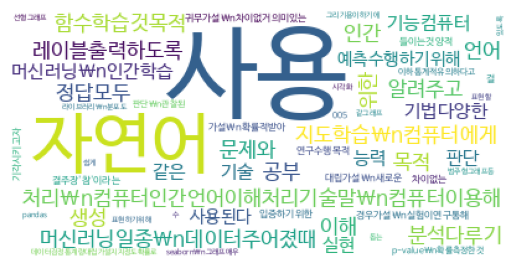

In [31]:
import matplotlib.pyplot as plt     # 낱말구름(wordCloud) 나타내기
plt.imshow(wordCloud)
plt.axis('off')         # x,y 축 눈금 삭제
plt.show()